# Author : TRINA GHOSH

# IST 707 : Assignment 03
## Digit Recognition with NBC, Random Forest, and SVM

# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn import metrics

In [2]:
os.getcwd()

'/Users/trinaghosh/Desktop/Trina/IST 707/HW3'

In [3]:
print(os.listdir(os.getcwd()))

['.Rhistory', 'Kaggle-digit-train-sample-small-1400.csv', 'tghosh-HW3.R', '.DS_Store', 'Kaggle-digit-test.csv', 'try1.ipynb', 'Kaggle-digit-train.csv', '.RData', '.ipynb_checkpoints', 'Kaggle_Submission.csv', 'Kaggle-digit-test-sample1000.csv']


# Loading Dataset

In [4]:
train = pd.read_csv("Kaggle-digit-train-sample-small-1400.csv")

In [5]:
test = pd.read_csv("Kaggle-digit-test-sample1000.csv")

### Dataset for Kaggle Submission

In [6]:
test_kaggle = pd.read_csv("Kaggle-digit-test.csv")

### To view the datasets

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Pre-Processing

## Splitting train data into training set and validation set.

### Splitting labelled data into 80% of training data and 20% validation data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train[train.columns[1:785]], train[train.columns[0]], test_size=0.2)

# Training and Validating the Gaussian NB Model

In [10]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [11]:
gnb = GaussianNB()

In [67]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
gnb_pred = gnb.predict(X_test)

In [69]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, gnb_pred)*100, 2)}%")

Accuracy: 56.79%


# Tuning the NB model with hyperparameter

### var_smoothing = True

In [15]:
gnb2 = GaussianNB(var_smoothing=True)

In [16]:
gnb2.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=True)

In [17]:
gnb2_pred = gnb2.predict(X_test)

In [18]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, gnb2_pred)*100, 2)}%")

Accuracy: 69.64%


### Accuracy went up by ~13%

### Final Accuracy = 69%

# Random Forest Classifier
### Using the training and validation sets from above.

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [21]:
# Fit on training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
rf_prediction = rf_model.predict(X_test)

In [23]:
rf_probs = rf_model.predict_proba(X_test)[:, 1]

In [24]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, rf_prediction)*100, 2)}%")

Accuracy: 91.43%


In [25]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

In [26]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf_model.predict(X_test))
print(sk_report)

              precision    recall  f1-score   support

           0   0.903226  0.965517  0.933333        29
           1   0.918919  0.971429  0.944444        35
           2   1.000000  0.888889  0.941176        27
           3   0.866667  0.896552  0.881356        29
           4   0.851852  0.920000  0.884615        25
           5   0.888889  0.827586  0.857143        29
           6   0.920000  0.884615  0.901961        26
           7   0.939394  0.968750  0.953846        32
           8   1.000000  0.857143  0.923077        21
           9   0.892857  0.925926  0.909091        27

    accuracy                       0.914286       280
   macro avg   0.918180  0.910641  0.913004       280
weighted avg   0.916610  0.914286  0.914178       280



# Tuning the RF model with Hyperparameters

### Using Grid Search CV

In [27]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [5,10,50,100],
    'max_features': [5,10,30],
    'min_samples_split': [1.0,2],
    'n_estimators': [500,600],
    'criterion': ['gini','entropy']
}

In [63]:
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [64]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  2.4min finished
/Users/trinaghosh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [70]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 600}

In [71]:
result = grid_search.predict(X_test)

In [72]:
print(f"Accuracy: {round(metrics.accuracy_score(y_pred= result, y_true=y_test)*100,2)}%")

Accuracy: 91.07%


### Accuracy = 91%

# Support Vector Machine

In [34]:
from sklearn import svm
from sklearn import model_selection, base

### Using the training and validation datasets from above.
### Linear SVM

In [35]:
lin_svm = svm.LinearSVC()
lin_svm

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [36]:
bs = model_selection.ShuffleSplit(n_splits=50,test_size=0.3,random_state=0)

In [38]:
svm_param_grid = [
    {'C': [0.001,0.01,0.1,1],
     'penalty': ['l2']}
]

In [39]:
gridbs = GridSearchCV(lin_svm,param_grid=svm_param_grid,cv=bs,n_jobs = -1,verbose=2)
gridbs.fit(X_train,y_train)

Fitting 50 folds for each of 4 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    8.3s finished
/Users/trinaghosh/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=ShuffleSplit(n_splits=50, random_state=0, test_size=0.3, train_size=None),
             error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [40]:
gridbs.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [41]:
y_pred = gridbs.predict(X_test)

In [42]:
print(f"Accuracy: {round(metrics.accuracy_score(y_pred=y_pred, y_true=y_test)*100,2)}%")

Accuracy: 81.79%


In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
confusion_matrix(y_test, gridbs.predict(X_test))

array([[26,  0,  0,  0,  0,  2,  0,  0,  1,  0],
       [ 0, 34,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  1, 21,  0,  0,  0,  0,  1,  1,  2],
       [ 0,  1,  0, 24,  0,  2,  0,  1,  1,  0],
       [ 0,  0,  0,  1, 23,  0,  0,  0,  0,  1],
       [ 2,  0,  2,  1,  4, 17,  0,  1,  1,  1],
       [ 0,  0,  2,  0,  0,  1, 23,  0,  0,  0],
       [ 1,  0,  2,  0,  0,  0,  0, 28,  0,  1],
       [ 0,  0,  1,  2,  0,  3,  0,  1, 13,  1],
       [ 0,  0,  0,  0,  5,  0,  0,  2,  0, 20]])

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.94      0.97      0.96        35
           2       0.75      0.78      0.76        27
           3       0.86      0.83      0.84        29
           4       0.72      0.92      0.81        25
           5       0.65      0.59      0.62        29
           6       1.00      0.88      0.94        26
           7       0.82      0.88      0.85        32
           8       0.76      0.62      0.68        21
           9       0.77      0.74      0.75        27

    accuracy                           0.82       280
   macro avg       0.81      0.81      0.81       280
weighted avg       0.82      0.82      0.82       280



### Accuracy = 82%

### Out of the 3 algorithms, "Random Forest model" is the most accurate.
### Therefore, running the "Random Forest" model on unlabelled test data.

# Kaggle Submission for Random Forest

In [56]:
result = grid_search.predict(test_kaggle[test_kaggle.columns[1:785]])

In [57]:
result

array([2, 0, 9, ..., 3, 9, 2])

In [58]:
x = range(28000)

In [59]:
results = pd.DataFrame(x,result)
results.to_csv('Kaggle_Submission2.csv')

# Kaggle Submission Score = 0.91714 or 91.7%¶

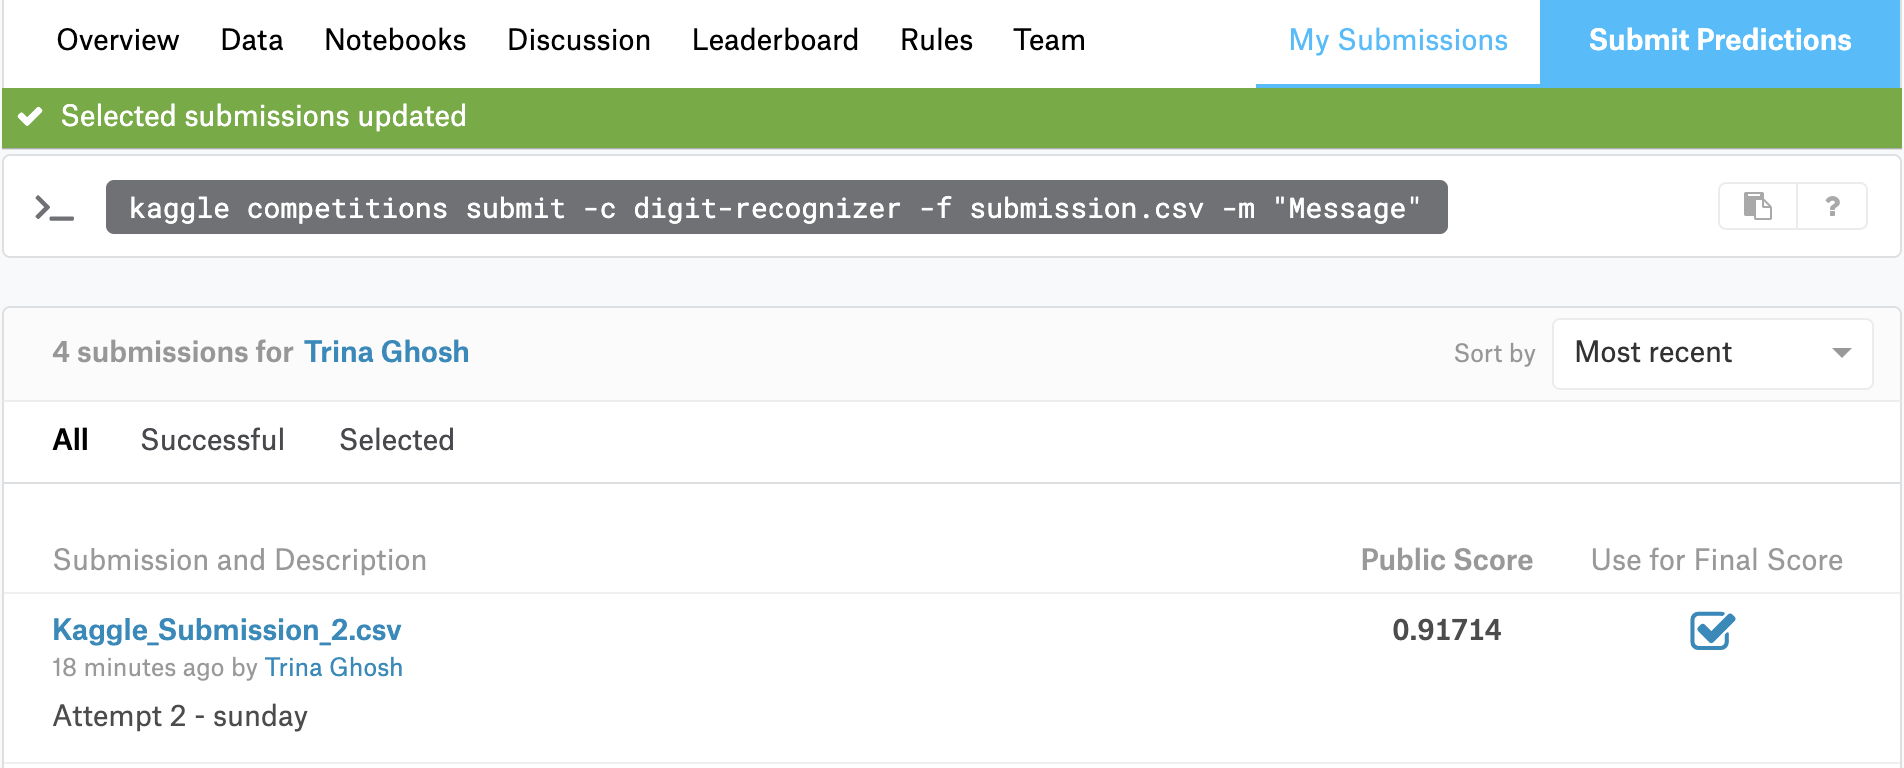

# Conclusion

### Train_test_split under Data Pre-Processing is only done once before running the differnet models and algorithms to ensure that the models are being fit and predicted on the same set of data. Running train_test_split again and again causes re-sampling and the datasets are different. Hence, our accuracy is hampered. 

### Out of the three algorithms, Random Forest gives us the most accuracy while validation, i.e. 91%.
### When we use the model to predict unlabelled data of 28000 data points, it gives us ~92% accuracy according to Kaggle. 
### This is good as we started with 1400 labelled samples for training and cross-validation. 
### Therefore, no overfitting occurs because ~92% of our unlabelled data is predicted correctly. 

### Out of the 3 models, Random Forest runs the slowest at 2.4 minutes, with ~600 fits but gives us the maximum accuracy.
### Gaussian Naive-Bayes runs the fastest, almost instantly but gives us the lowest accuracy, i.e., 56 to 69%.
### Random forest is a form of ensemble learning method which iterates through every possible tree to give us the best model with highest accuracy. This takes time. Whereas, Naive-Bayes only looks through one classification model to give us results, therefore faster and less accurate. 